# Import Data  


**Activity 1**: Read data in an `csv` file to a pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv("ENB2012_data.csv")
# -----------------------------------

Explore the first 10 rows in the dataframe.

In [2]:

df
# -----------------------------------

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Check for data type of each columns

In [3]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

**Activity 2**: Label preparation.  Our label indicates whether a sample is an energy saving or not.  The energy saving refers to the difference between heating load (hl) and the cooling load (cl) that is greater than a threshold (alpha).  In this tutorials, we set alpha equal to 1.  Complete the following utility function `getlabel`. Where `Y1` is Heatling Load, `Y2` is Cooling load. 

In [4]:
import numpy as np

def getlabel(hl, cl, alpha=1):
    
    if np.abs(hl - cl) - alpha >= 0:
    
        return 1
    else:
        return 0

Apply the `getlabel` to create the new column in dataframe `df` using the annonymous function `lambda`.

In [5]:
df["is_energy_saving"] = df.apply(lambda x: getlabel(x["Y1"], x["Y2"]), axis=1)

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1


# Exploratory Data Analysis  

For classification task, it is important to understand the class distribution.  
Use `groupby` to explore the class distribution over `is_energy_saving`.

In [7]:
df.groupby("is_energy_saving").size().reset_index(name="#")

,is_energy_saving,#
0,0,148
1,1,620


Make sure that all variables are usable and clearly defined.  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X1                768 non-null    float64
 1   X2                768 non-null    float64
 2   X3                768 non-null    float64
 3   X4                768 non-null    float64
 4   X5                768 non-null    float64
 5   X6                768 non-null    int64  
 6   X7                768 non-null    float64
 7   X8                768 non-null    int64  
 8   Y1                768 non-null    float64
 9   Y2                768 non-null    float64
 10  is_energy_saving  768 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 66.1 KB


In [9]:
df.groupby("X8").size().reset_index(name="#")

,X8,#
0,0,48
1,1,144
2,2,144
3,3,144
4,4,144
5,5,144


By cross checking with the dataset documents, we found that the variable `X8` was inconsistent.  The document defined its possible values as 1, 2, 3, 4, and 5 but the actual data has undefined value as zero.  Therefore, the `X8` will be excluded from our analysis.

# Create dummy variables  

Logistic regerssion requires dummy variables to handle a categorical variable.  
**Activity 3**: Map the following values in `X6` then create dummy variables.  
- 2: north  
- 3: east  
- 4: south  
- 5: west  

Then concatenate the dummy variables to the original dataframe.

In [10]:
# --- To be completed by students ---
df["orientation"] = df["X6"].map({2: "north", 3: "east", 4: "south", 5: "west"})
orientation = pd.get_dummies(df["orientation"], dtype=int)
# -----------------------------------

In [11]:
orientation.head()

,east,north,south,west
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [12]:
# --- To be completed by students ---
df = pd.concat([df, orientation], axis=1)
# -----------------------------------

In [13]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0


In [14]:
df.isnull().any()

X1                  False
X2                  False
X3                  False
X4                  False
X5                  False
X6                  False
X7                  False
X8                  False
Y1                  False
Y2                  False
is_energy_saving    False
orientation         False
east                False
north               False
south               False
west                False
dtype: bool

# Data Splitting  

Data splitting relies on randomization processes.  To make a reproducable experiment, we will set a random seed first.  
**Activity 4**: Split the original data into 3 dataframes: `train` (70%), `test` (15%), `val` (15%).  For the consistent splitting, we will split the original data to remain:test at 85:15 then split the remain data to train:val at 70:15 with respect to the size of original data.  The prepare `X` and `y` from the original dataframe `df`.

In [15]:
from sklearn.model_selection import train_test_split

seed = 433 # Set random seed

train, remain = train_test_split(df, test_size=0.3,
                                stratify=df["is_energy_saving"], random_state=seed)

test, val = train_test_split(remain, test_size=0.15,
                              stratify=remain["is_energy_saving"], random_state=seed)


Defiine your full dataset `X` and `y` from the dataframe `df`.  The `X` takes `X1`, `X2`, `X3`, `X4`, `X5`, `east`, `south`, `west`, and `X7` as features.  The target `y` is `is_energy_saving`.

In [16]:
# remove north
features_lst = ["X1", "X2", "X3", "X4", "X5", "east", "south", "west", "X7"]
X = df.loc[:, features_lst].values
y = df["is_energy_saving"].values.ravel()


Make sure that the class distribution in `train`, `val`, and `test` are almost the same by using visualization.

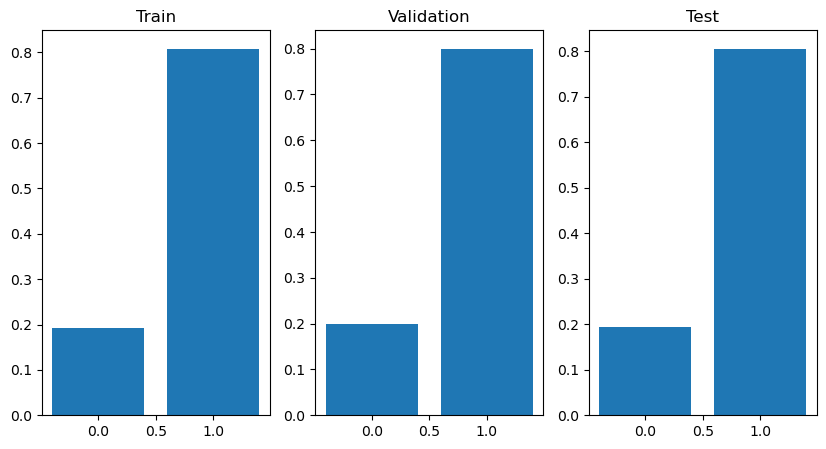

In [17]:
import matplotlib.pyplot as plt

train_dist = train.groupby("is_energy_saving").size().reset_index(name="#")
train_dist["%"] = train_dist["#"] / train_dist["#"].sum()

val_dist = val.groupby("is_energy_saving").size().reset_index(name="#")
val_dist["%"] = val_dist["#"] / val_dist["#"].sum()

test_dist = test.groupby("is_energy_saving").size().reset_index(name="#")
test_dist["%"] = test_dist["#"] / test_dist["#"].sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].bar(train_dist["is_energy_saving"], train_dist["%"])
ax[0].set_title("Train")
ax[1].bar(val_dist["is_energy_saving"], val_dist["%"])
ax[1].set_title("Validation")
ax[2].bar(test_dist["is_energy_saving"], test_dist["%"])
ax[2].set_title("Test")
plt.show()

# Modeling  
`RandomSearchCV` and `GridSearchCV` were applied as our model tuning strategies.  The `RandomSearchCV` was applied first to determine roughly optimal set of hyperparameters on the hyperplane.  There are several hyperparameters can be tuned.  For understanding purpose, our tutorials will tune only 2 hyperparameters: `C` and `penalty`.  

Create a random hyperplane of `C` and `penalty`

In [18]:
from scipy.stats import uniform

np.random.seed(seed)
rd_hparams = dict(C=uniform(loc=0, scale=5), penalty=["l2", "l1"])

**Activity 5**: Initialize a `Logistic Regression` to learn from balanced class distribution.  Use our predefined random seed and fit the model with `saga` optimizer.  Set the maximum learning iteration at 500.  Then apply the `RandomSearchCV` to our `Logistic Regression` using train, test, validate approach.  Use `accuracy` as the metrics for model convergence monitoring.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# class_weight="balanced" to address imbalance data
logreg = LogisticRegression(class_weight="balanced",
                            random_state=seed,
                            verbose=1,
                            solver="saga",
                            max_iter=5000)

rand_tune = RandomizedSearchCV(logreg,
                               rd_hparams,
                               random_state=seed,
                               cv=[(train.index, val.index)],
                               scoring="accuracy")

rand_search = rand_tune.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3486 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds
convergence after 3468 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3493 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3466 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2937 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


The best estimator from `RandomSearchCV` can be accessed via the attribute `best_estimator_`

In [20]:
rand_search.best_estimator_

LogisticRegression(C=2.3907937312322107, class_weight='balanced', max_iter=5000,
                   penalty='l1', random_state=433, solver='saga', verbose=1)

The best estimator located approximately optimum set of hyperparameters.  Let's define the precise grid of hyperparameters for fine tuning.  Since the `penalty` is a categorical variable, we will use as is without fine tuning.  

**Activity 6**: Create a 1D grid where each tick moves around 0.05 for 5 ticks before and after the best `C` obtained from `RandomSearchCV`.

In [21]:
C = [rand_search.best_estimator_.C + 0.05*i for i in range(-5, 6)]


Define the grid for `GridSearchCV` to precisely determine the set of optimum hyperparameters.

In [22]:
#Prevent C < 0
gd_hparams = {"C": [i if i > 0 else 0.01 for i in C], "penalty": [rand_search.best_estimator_.penalty]}

**Activity 7**: Initialize the `Logistic Regression` with the same hyperparameters as the `RandSearchCV` but apply it on the `GridSearchCV`.

In [23]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(class_weight="balanced",
                         random_state=seed,
                         verbose=1,
                         solver="saga",
                         max_iter=5000)


grid_tune = GridSearchCV(clf, gd_hparams, cv=[(train.index, val.index)], scoring="accuracy")
grid_search = grid_tune.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3482 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2937 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Let see our best estimator from `GridSearchCV`.

In [24]:
grid_search.best_estimator_

LogisticRegression(C=2.1407937312322107, class_weight='balanced', max_iter=5000,
                   penalty='l1', random_state=433, solver='saga', verbose=1)

Model parameters of `Logistic Regression` can be accessed via `coef_` and `intercept_`.

In [25]:
coef_dict = dict(zip(features_lst, list(grid_search.best_estimator_.coef_[0])))
coef_dict


{'X1': 0.030608004678931284,
 'X2': 0.005651433059772649,
 'X3': -0.024044482463522098,
 'X4': 0.014847841542763788,
 'X5': 0.28914103816471487,
 'east': -0.03731396723140946,
 'south': -0.002660147545659666,
 'west': 0.046521783156427285,
 'X7': -0.0645729612803755}

In [26]:
grid_search.best_estimator_.intercept_

array([0.02590085])

# Prediction  

The trained model is ready for prediction.  Use `predict_proba` to estimate prediction probability.

In [27]:
probs = grid_search.best_estimator_.predict_proba(X[test.index])

The first column of `probs` refers to $P(y=0|X)$.  The second column of `probs` refers to $P(y=1|X)$.  

In [28]:
probs

array([[0.63116658, 0.36883342],
       [0.49745012, 0.50254988],
       [0.61318029, 0.38681971],
       [0.60208938, 0.39791062],
       [0.19757101, 0.80242899],
       [0.19029922, 0.80970078],
       [0.36519811, 0.63480189],
       [0.47650846, 0.52349154],
       [0.13668493, 0.86331507],
       [0.49502877, 0.50497123],
       [0.14114805, 0.85885195],
       [0.13699914, 0.86300086],
       [0.47892514, 0.52107486],
       [0.60262691, 0.39737309],
       [0.6504597 , 0.3495403 ],
       [0.61381106, 0.38618894],
       [0.19179617, 0.80820383],
       [0.26772318, 0.73227682],
       [0.09156709, 0.90843291],
       [0.13668493, 0.86331507],
       [0.59976656, 0.40023344],
       [0.47959956, 0.52040044],
       [0.20198769, 0.79801231],
       [0.61381106, 0.38618894],
       [0.38484414, 0.61515586],
       [0.65265869, 0.34734131],
       [0.36696082, 0.63303918],
       [0.60262691, 0.39737309],
       [0.59143503, 0.40856497],
       [0.91245842, 0.08754158],
       [0.

# Prediction and Inference

Model calibration helps to get better inference the predicted labels by determining the cutoff probability from the `training data`.  Without calibration, the default cutoff in `scikit-learn` is set at 0.5 and can be directly inference via `predict`. Basic idea to derive the optimum cutoff is the `ROC curve` where the optimum cutoff makes the curve approch to the top left corner.  Therefore, the optimum cutoff yields the maximum difference between `TPR` (True-Positive Rate) and `FPR` (False-Positive Rate).  

**Activity 8**: Use `roc_curve` to determine the optimum cutoff.

In [29]:
from sklearn.metrics import roc_curve


p = grid_search.best_estimator_.predict_proba(X[train.index])
fpr, tpr, thresholds = roc_curve(y_true=y[train.index], y_score=p[:, 1], pos_label=1)
idx = np.argmax(tpr - fpr)
cutoff = thresholds[idx]

print("The optimum cutoff is {}".format(round(cutoff, 3)))


The optimum cutoff is 0.526


Use the `cutoff` to derive predicted labels.

In [30]:
yhat = (probs[:, 1] >= cutoff).astype(int)

In [31]:
yhat

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

# Evaluation  

Model performance evaluation starts from deriving a confusion matrix.  Performance metrics such as `precision`, `recall`, `F1`, and `accuracy` can be obtained from the confusion matrix.

**Activity 9**: Get the confusion matrix.

In [32]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y[test.index], yhat)


print(cmat)

[[ 35   3]
 [ 49 109]]


For binary classification, each count is located as follows.  
- `TP`: cmat[1, 1]  
- `TN`: cmat[0, 0]  
- `FP`: cmat[0, 1]  
- `FN`: cmat[1, 0]

**Activity 10**: Measure `precision`, `recall`, `F1`, and `accuracy`.

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# ------ To be completed by students ------
precision = precision_score(y[test.index], yhat)
recall = recall_score(y[test.index], yhat)
accuracy = accuracy_score(y[test.index], yhat)
f1 = f1_score(y[test.index], yhat)
# -----------------------------------------

print("Precision is {}".format(round(precision, 3)))
print("Recall is {}".format(round(recall, 3)))
print("Accuracy is {}".format(round(accuracy, 3)))
print("F1 is {}".format(round(f1, 3)))

Precision is 0.973
Recall is 0.69
Accuracy is 0.735
F1 is 0.807


Explore the model behaviors in `ROC Curve`.

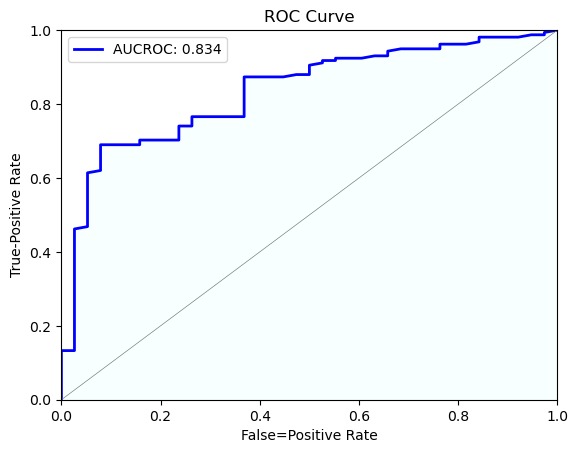

In [34]:
from sklearn.metrics import roc_auc_score

aucroc = roc_auc_score(y_true=y[test.index], y_score=probs[:, 1])
fpr, tpr, thresholds = roc_curve(y_true=y[test.index], y_score=probs[:, 1], pos_label=1)

plt.style.use("default")
plt.plot(fpr, tpr, color="blue", linewidth=2, label="AUCROC: {}".format(round(aucroc, 3)))
plt.plot([0, 1], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False=Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)


# Analysis of Error  

Constructing a building takes long time and consumes high costs.  Therefore, `precision` is more important than `recall` because `FP` (identify non-energy saving as energy-saving) could lead to the wrong investment.  Our analysis of error will focus on `FP` samples.  

Let's add 2 columns ($P(y=1|X)$ and `yhat`) to the test dataframe

In [35]:
samples = test.copy()
samples["P(y|X)"] = probs[:, 1]
samples["yhat"] = yhat

samples.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,P(y|X),yhat
103,0.90,563.5,318.5,122.50,7.0,5,0.10,2,27.90,34.20,1,west,0,0,0,1,0.368833,0
381,0.62,808.5,367.5,220.50,3.5,3,0.25,2,14.66,15.64,0,east,1,0,0,0,0.502550,0
432,0.98,514.5,294.0,110.25,7.0,2,0.25,4,28.70,29.61,0,north,0,1,0,0,0.386820,0
291,0.98,514.5,294.0,110.25,7.0,5,0.25,1,28.41,29.49,1,west,0,0,0,1,0.397911,0
416,0.69,735.0,294.0,220.50,3.5,2,0.25,3,12.34,14.92,1,north,0,1,0,0,0.802429,1


Perform dataframe slicing to get only `FP` samples.

In [36]:
fp = samples[(samples["is_energy_saving"] == 0) & (samples["yhat"] == 1)]

fp.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,P(y|X),yhat
155,0.86,588.0,294.0,147.0,7.0,5,0.1,3,26.46,27.40,0,west,0,0,0,1,0.634802,1
249,0.86,588.0,294.0,147.0,7.0,3,0.1,5,26.45,27.33,0,east,1,0,0,0,0.615156,1
271,0.71,710.5,269.5,220.5,3.5,5,0.1,5,13.69,13.89,0,west,0,0,0,1,0.870906,1


Explaining wrong prediction over these samples requires domain knowledge and probably statistics.

In [37]:
volume_to_surface_ratio = fp["X1"].describe()
volume_to_surface_ratio

count    3.000000
mean     0.810000
std      0.086603
min      0.710000
25%      0.785000
50%      0.860000
75%      0.860000
max      0.860000
Name: X1, dtype: float64

In [38]:
surface_area = fp["X2"].describe()
surface_area

count      3.000000
mean     628.833333
std       70.725408
min      588.000000
25%      588.000000
50%      588.000000
75%      649.250000
max      710.500000
Name: X2, dtype: float64

In [39]:
wall_area = fp["X3"].describe()
wall_area

count      3.000000
mean     285.833333
std       14.145082
min      269.500000
25%      281.750000
50%      294.000000
75%      294.000000
max      294.000000
Name: X3, dtype: float64